In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from statsmodels.tsa.seasonal import STL
import requests
import json
import pandas as pd
plt.rcParams['savefig.facecolor'] = "0.8"

In [2]:
df = pd.read_csv('BTC_Daily_ohlc.csv')

In [16]:
start_date = "2022-10-01"
end_date = "2023-02-31"
mask = (df["date"] > start_date) & (df["date"] <= end_date)
df_short_date = df.loc[mask]

min_coloumn = df_short_date.min(axis=0)
max_coloumn = df_short_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_short_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

Min_x : 0
Max_x : 151
Min_y : 15476.05125538628
Max_y : 25250.160223769217


In [17]:
start_date = "2022-10-01"
end_date = "2024-01-31"
mask = (df["date"] > start_date) & (df["date"] <= end_date)
df_date = df.loc[mask]

min_coloumn = df_date.min(axis=0)
max_coloumn = df_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

Min_x : 0
Max_x : 487
Min_y : 15476.05125538628
Max_y : 48973.29998031062


In [13]:
def candleplot(df, x_min = 0, x_max = len(df), savefig =  True):
    ## Figure params
    plt.figure(dpi = 200)
    # plt.ylabel('price (dollars)')
    plt.xlabel('timesteps')

    ## Import ohlc 
    opens = df['open'].values[x_min:x_max]
    truth = df['close'].values[x_min:x_max]
    highs = df['high'].values[x_min:x_max]
    lows = df['low'].values[x_min:x_max]

    ## Draw candles
    height = truth - opens
    bottom = np.where(height > 0, opens, truth + abs(height))
    color = np.where(height > 0, 'g', 'r')
    plt.bar(range(len(truth)), height, bottom=bottom, color=color, align='center')
    plt.vlines(range(len(highs)), ymin=lows, ymax=highs, color=color, linewidth=1)

    if savefig :
        plt.savefig(f'./plots/plot_BTC_{x_min}:{x_max}')

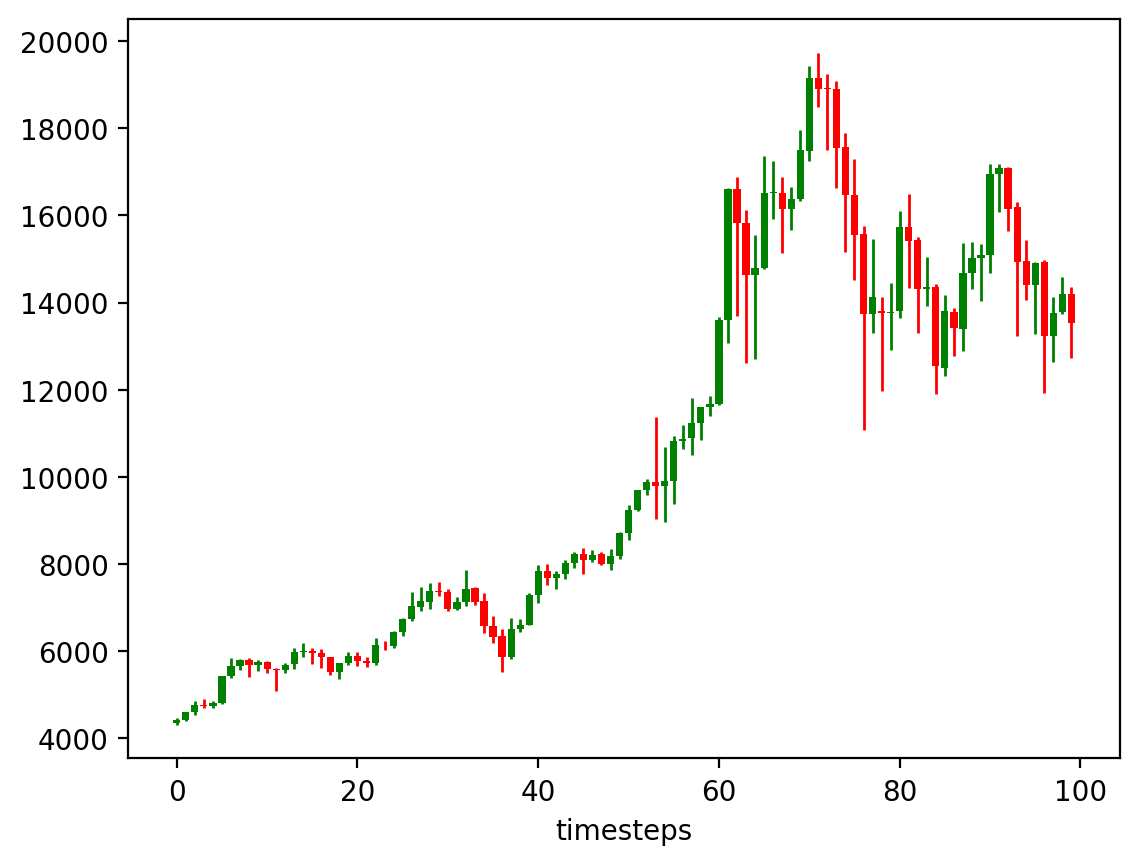

In [8]:
candleplot(df, x_min = 50, x_max = 150, savefig= True)

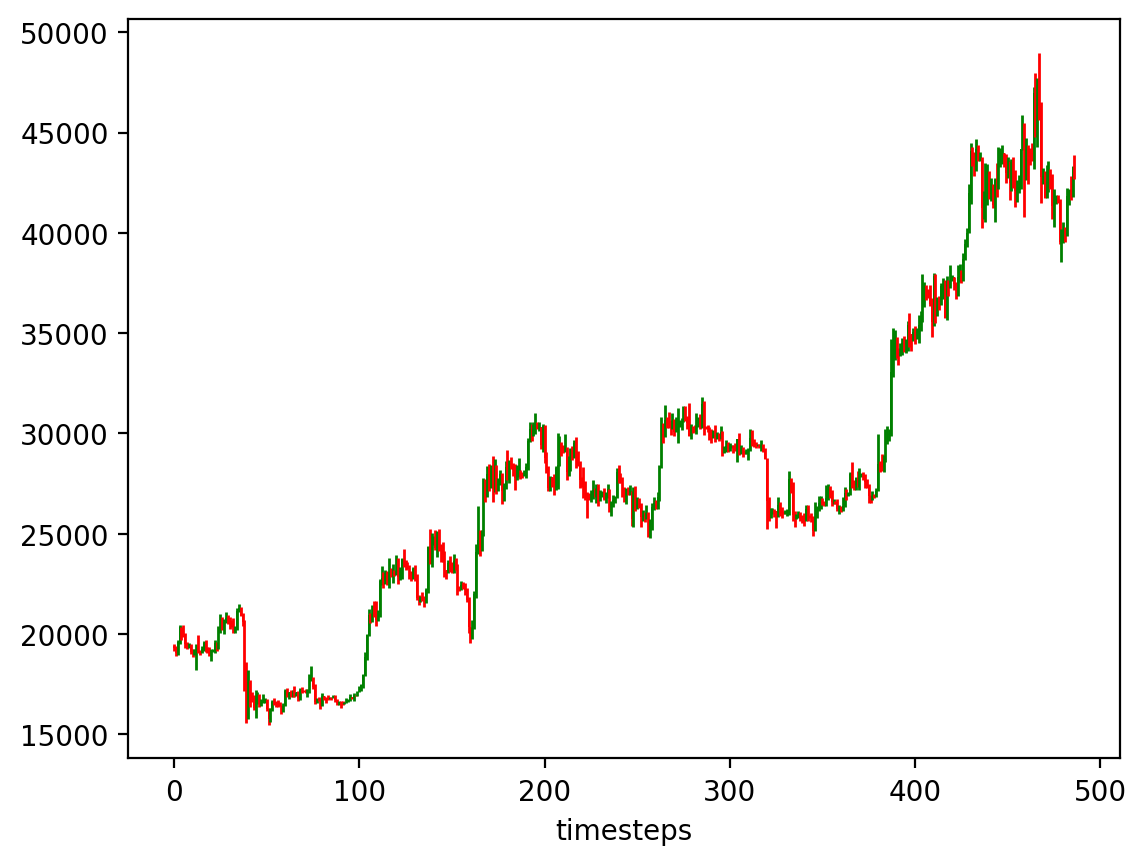

In [11]:
candleplot(df_date, savefig= True)

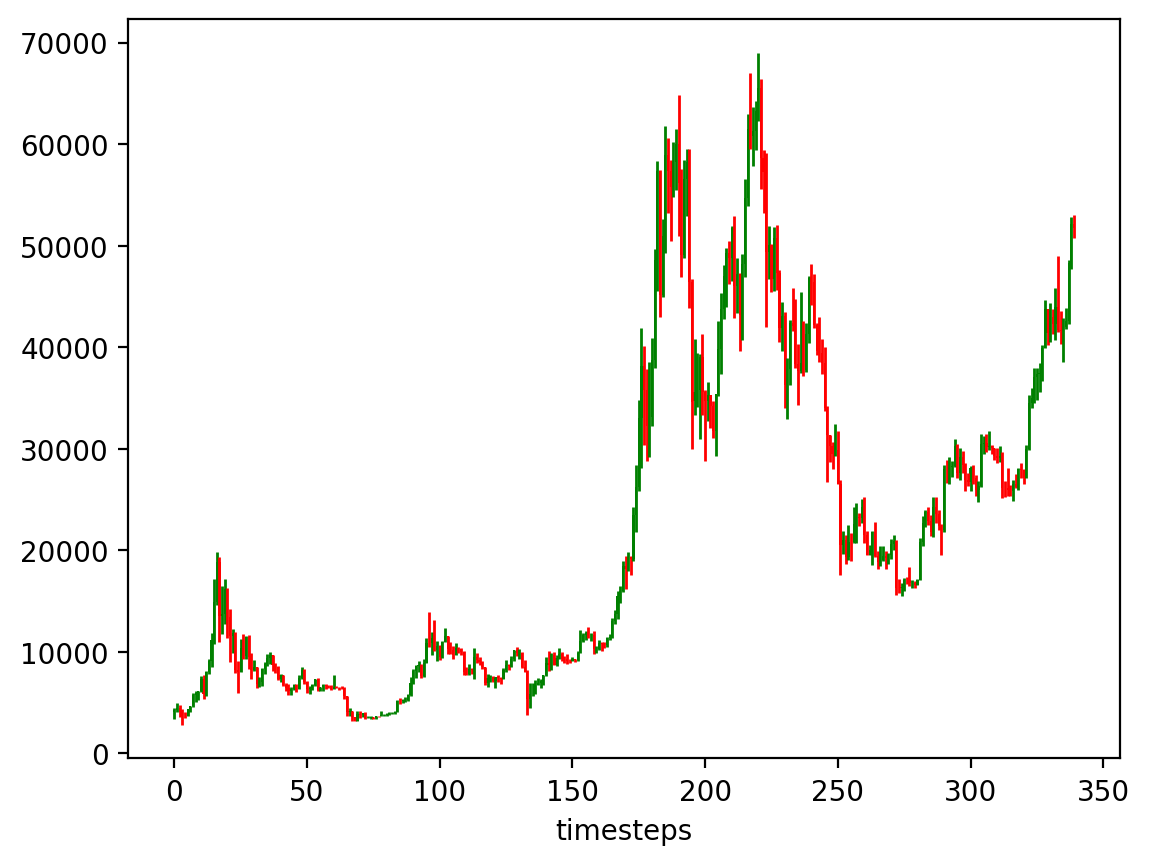

In [20]:
df_weekly = pd.read_csv('BTC_BinWeekly.csv')
candleplot(df_weekly, savefig= True)